# Linear Regression with Batch Gradient Descent

You will train your model using a real world dataset.  The dataset contains a collection of real estate listings in San Luis Obispo county.

The model predict the price given the square footage of the house.


In [2]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt

# read dataset
df = pd.read_csv("housing_price_data.csv")

df.head()

,MPLS,Price,Bedrooms,Bathrooms,Size,PriceSq
0,132842,795000,3,3,2371,335.30
1,134364,399000,4,3,2818,141.59
2,135141,545000,4,3,3032,179.75
3,135712,909000,4,4,3540,256.78
4,136282,109900,3,1,1249,87.99


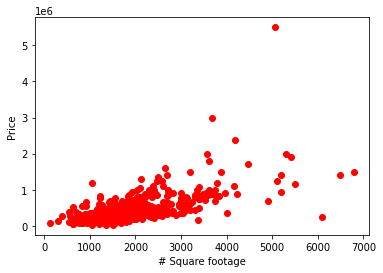

In [3]:
# Plot data points
X, y = (df["Size"].values,df["Price"].values)
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)

# plots the data points
plt.plot(X, y, 'ro')
plt.xlabel("# Square footage")
plt.ylabel("Price")
plt.show()

In [4]:
# Normalize the house size, e.g., subtract min and divide by (max-min) to ensure 
# the scale is compatible with the bias, which is 1
max_min = X.max(0) - X.min(0)
Xmin = X.min(0)
X = (X-Xmin) / max_min

# Add bias
z=np.ones((len(X),1)) 
X = X.reshape(len(X),1)
X = np.concatenate((z,X), axis=1)                
y = y.reshape(len(X),1) 

# sort for testing/plotting
Xsort = np.sort(X, axis=0)

print(X.shape)
print(y.shape)

# For non-vectorized
X_train = X[:,1]
y_train = y

(781, 2)
(781, 1)


## Complete this code

In [5]:
# Initialize vector w 
np.random.seed(20)
w = np.random.rand(2,1)
w0 = w[0]
w1 = w[1]

# Learning rate
nu = 0.01

N = len(y)

# Number of epochs
MAX_EPOCHS = 2000

mse_array = []  

# Loop for 2000 epochs
for itr in range (0, MAX_EPOCHS):
    
    # X_train is 781x1 and y_train is 781x1
    x = X_train.reshape(781,1)
    y = y_train.reshape(781,1)
    y_pred = w0 + w1*x
    # TO DO: write update equation
    
    #Calculating differential
    dw0 = (2/N)*np.sum((y_pred - y))
    dw1 = (2/N)*np.sum((y_pred - y)*x)
    
    #Updating Weights
    w0 = w0 - nu*dw0
    w1 = w1 - nu*dw1

    # TO DO: compute mse
    sum_error = np.sum((y_pred - y)**2)
    
    mse = sum_error/N
    
    # Store MSE results for the plot
    mse_array.append(mse)

In [6]:
### IMPORTANT ###
## If non-vectorized, then need to form w
w = np.array([w0,w1])

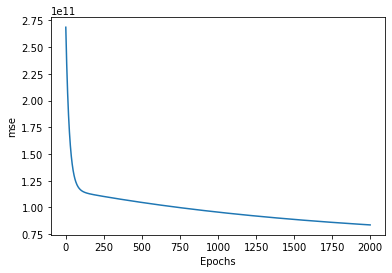

In [7]:
### Plot mse vs iterations
plt.plot(mse_array)  #
plt.xlabel("Epochs")
plt.ylabel("mse")
plt.show()

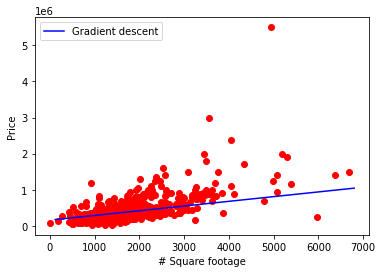

In [8]:
### Plot the fitted curve

yhat = np.dot(np.sort(X, axis=0),w)

plt.plot(X[:,1] * max_min, y, 'ro')
plt.plot(Xsort[:,1] *max_min + Xmin, yhat, 'b', label="Gradient descent")
plt.legend()
plt.xlabel("# Square footage")
plt.ylabel("Price")
plt.show()

In [9]:
### Predict the price of a 5000 sqft house
### Remember to normalize it first

size = 5000
size_normalized = (size - Xmin)/max_min
y_pred = w[0] + w1*[size_normalized]

print(y_pred)

[[809595.47975238]]
